This notebook evaluates the lower bound implied by the GPP fluxes alone.

For related code, see
1. `../src/notebooks/gpp_file_explore_functional_creation.ipynb`
2. `../src/data/build_constraints.py`

We also show the lower bound improvements implied by the optimization procedure.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
COLORS = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
import matplotlib

# matplotlib settings
matplotlib.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 18})
plt.rc('text.latex', preamble=r'\usepackage{bm}')

In [3]:
# read in the computed constraint objects
with open('/Users/mikestanley/Research/Carbon_Flux/optimization/data/sign_corrected/A_diag.npy', 'rb') as f:
    A = np.load(f)
    
with open('/Users/mikestanley/Research/Carbon_Flux/optimization/data/sign_corrected/b_vec.npy', 'rb') as f:
    b = np.load(f)
    
print(A.shape)
print(b.shape)

(26496,)
(26496,)


# North American Functional

In [4]:
# read in the unit-less functional vector
with open(
    '/Users/mikestanley/Research/Carbon_Flux/optimization/data/na_june_functional_no_control.npy', 'rb'
) as f:
    h_no_control = np.load(f)
    
print(h_no_control.shape)

(26496,)


In [5]:
# look at the lower bound -- NOTE this is the NEGATIVE of the GPP
GPP_NA = -np.dot(h_no_control, b)
print(GPP_NA)

-4.624416554554736


In [6]:
# percent improvement by optimizations -- both number are from output_investigation_08.ipynb
DUAL_LEP = -3.4492964972046596
PRIMAL_LEP = -2.478 

print(f'LEP DUAL Percent Improvement  : {(DUAL_LEP - GPP_NA) / GPP_NA * 100:.2f}%')
print(f'LEP PRIMAL Percent Improvement: {(PRIMAL_LEP - GPP_NA) / GPP_NA * 100:.2f}%')

LEP DUAL Percent Improvement  : -25.41%
LEP PRIMAL Percent Improvement: -46.41%


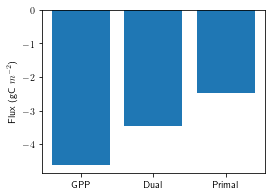

In [7]:
plt.figure(figsize=(4, 3))
plt.bar(x=np.arange(3), height=[GPP_NA, DUAL_LEP, PRIMAL_LEP])
plt.xticks(ticks=np.arange(3), labels=['GPP', 'Dual', 'Primal'])
plt.ylabel('Flux (gC $m^{-2}$)')
plt.show()

# Northern Hemisphere Functional

In [8]:
# read in the unit-less functional vector
with open(
    '/Users/mikestanley/Research/Carbon_Flux/optimization/data/nh_june_functional_no_control.npy', 'rb'
) as f:
    h_nh_no_control = np.load(f)
    
print(h_nh_no_control.shape)

(26496,)


In [9]:
# look at the lower bound -- NOTE this is the NEGATIVE of the GPP
GPP_NH = -np.dot(h_nh_no_control, b)
print(GPP_NH)

-3.9216272780600563


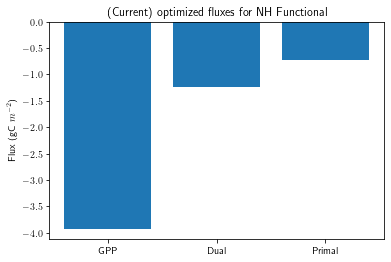

In [10]:
plt.figure(figsize=(6, 4))
DUAL_NH_LEP = -1.2322777703343457
PRIMAL_NH_LEP = -0.733347424681431
plt.bar(x=np.arange(3), height=[GPP_NH, DUAL_NH_LEP, PRIMAL_NH_LEP])
plt.xticks(ticks=np.arange(3), labels=['GPP', 'Dual', 'Primal'])
plt.title('(Current) optimized fluxes for NH Functional')
plt.ylabel('Flux (gC $m^{-2}$)')
plt.show()

# Plotting together

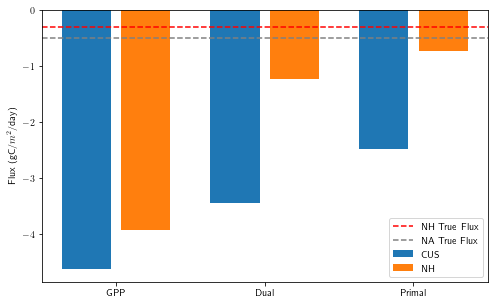

In [11]:
plt.figure(figsize=(8, 5))
plt.bar(x=np.arange(3) - 0.2, height=[GPP_NA, DUAL_LEP, PRIMAL_LEP], width=0.33, label='CUS')
plt.bar(x=np.arange(3) + 0.2, height=[GPP_NH, DUAL_NH_LEP, PRIMAL_NH_LEP], width=0.33, label='NH')
plt.xticks(ticks=np.arange(3), labels=['GPP', 'Dual', 'Primal'])
# plt.title('Optimized NA/NH bounds')
plt.ylabel('Flux (gC/$m^2$/day)')
plt.axhline(-0.298, linestyle='--', color='red', label='NH True Flux')
plt.axhline(-0.5, linestyle='--', color='gray', label='NA True Flux')
plt.legend()
# plt.tight_layout()
# plt.savefig('../figures/interval_optimizations/na_nh_lep_together.png', dpi=300)
plt.show()

# Recreating the one-sided interval plot

In [15]:
# interval endpoints
PRIMAL_LEP_NA = -2.47792285
DUAL_LEP_NA = -3.4492964972046596
SSB_LEP_NA = -3.664566151349848
GPP_NA = -4.624416554554736
FLUX_NA = -0.43602474289495025

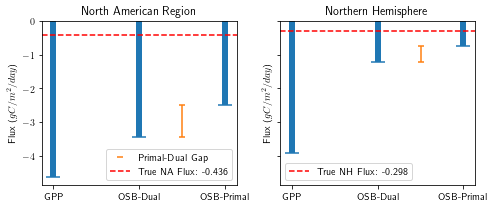

In [32]:
# primary plot showing the actual LEP values
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(7, 3), sharex=True, sharey=True)
tick_vals = np.arange(3)


# north american
ax[0].vlines(x=[1.5], ymin=[DUAL_LEP_NA], ymax=[PRIMAL_LEP_NA], color=COLORS[1])
ax[0].scatter(
    [1.5, 1.5], [DUAL_LEP_NA, PRIMAL_LEP_NA], color=COLORS[1], marker='_', label='Primal-Dual Gap'
)

heights = np.array([GPP_NA, DUAL_LEP, PRIMAL_LEP])
ax[0].bar(
    x=tick_vals, width=0.07,
    height=heights, color=COLORS[0]
)
ax[0].scatter(tick_vals, heights, marker='_', s=200, color=COLORS[0])
ax[0].set_xticks(
    ticks=tick_vals,
    labels=['GPP', 'OSB-Dual', 'OSB-Primal'],
    rotation=0
)

ax[0].axhline(FLUX_NA, linestyle='--', color='red', label=f'True NA Flux: {FLUX_NA:.3f}')
ax[0].set_ylabel('Flux ($gC/m^{2}/day$)')
ax[0].legend()

# northern hemisphere
ax[1].vlines(x=[1.5], ymin=[DUAL_NH_LEP], ymax=[PRIMAL_NH_LEP], color=COLORS[1])
ax[1].scatter(
    [1.5, 1.5], [DUAL_NH_LEP, PRIMAL_NH_LEP], color=COLORS[1], marker='_'
)

heights = np.array([GPP_NH, DUAL_NH_LEP, PRIMAL_NH_LEP])
ax[1].bar(
    x=tick_vals, width=0.07,
    height=heights, color=COLORS[0]
)
ax[1].scatter(tick_vals, heights, marker='_', s=200, color=COLORS[0])
ax[1].set_xticks(
    ticks=tick_vals,
    labels=['GPP', 'OSB-Dual', 'OSB-Primal'],
    rotation=0
)

ax[1].axhline(-0.298, linestyle='--', color='red', label=f'True NH Flux: {-0.298}')
ax[1].set_ylabel('Flux ($gC/m^{2}/day$)')
ax[1].legend()

ax[0].set_title('North American Region')
ax[1].set_title('Northern Hemisphere')


plt.tight_layout()
plt.savefig('../figures/final_images/na_and_nh_intervals.png', dpi=500)
plt.show()

In [34]:
(PRIMAL_LEP_NA - GPP_NA)/GPP_NA

-0.4641653015536816

In [36]:
(PRIMAL_NH_LEP - GPP_NH)/GPP_NH

-0.8129992034724416

In [37]:
(DUAL_NH_LEP - GPP_NH)/GPP_NH

-0.6857738681010178